## 範例重點
* 學會從 Keras 內建函式取得資料
* 能夠建立簡易的深度學習模型
* 觀察並了解 Overfit 現象

In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [4]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [5]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [6]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 4s 21ms/step - loss: 1.9283 - accuracy: 0.3070 - val_loss: 1.7866 - val_accuracy: 0.3612
Epoch 2/100
196/196 [==============================] - 4s 22ms/step - loss: 1.7004 - accuracy: 0.3892 - val_loss: 1.6486 - val_accuracy: 0.4085
Epoch 3/100
196/196 [==============================] - 5s 26ms/step - loss: 1.6069 - accuracy: 0.4264 - val_loss: 1.6234 - val_accuracy: 0.4118
Epoch 4/100
196/196 [==============================] - 5s 27ms/step - loss: 1.5465 - accuracy: 0.4483 - val_loss: 1.5616 - val_accuracy: 0.4483
Epoch 5/100
196/196 [==============================] - 5s 26ms/step - loss: 1.5036 - accuracy: 0.4624 - val_loss: 1.5336 - val_accuracy: 0.4491
Epoch 6/100
196/196 [==============================] - 4s 22ms/step - loss: 1.4715 - accuracy: 0.4756 - val_loss: 1.5708 - val_accuracy: 0.4436
Epoch 7/100
196/196 [==============================] - 5s 23ms/step - loss: 1.4353 - accuracy: 0.4885 - val_loss: 1.4592 - val_accuracy:

196/196 [==============================] - 5s 24ms/step - loss: 0.5880 - accuracy: 0.7885 - val_loss: 1.9072 - val_accuracy: 0.5093
Epoch 58/100
196/196 [==============================] - 5s 24ms/step - loss: 0.5672 - accuracy: 0.7972 - val_loss: 1.9409 - val_accuracy: 0.5019
Epoch 59/100
196/196 [==============================] - 5s 23ms/step - loss: 0.5669 - accuracy: 0.7948 - val_loss: 2.0443 - val_accuracy: 0.5092
Epoch 60/100
196/196 [==============================] - 5s 23ms/step - loss: 0.5485 - accuracy: 0.8026 - val_loss: 1.9837 - val_accuracy: 0.5111
Epoch 61/100
196/196 [==============================] - 5s 26ms/step - loss: 0.5371 - accuracy: 0.8076 - val_loss: 2.0133 - val_accuracy: 0.5083
Epoch 62/100
196/196 [==============================] - 5s 26ms/step - loss: 0.5247 - accuracy: 0.8093 - val_loss: 2.0471 - val_accuracy: 0.5082
Epoch 63/100
196/196 [==============================] - 5s 24ms/step - loss: 0.5017 - accuracy: 0.8209 - val_loss: 2.1283 - val_accuracy: 0.508

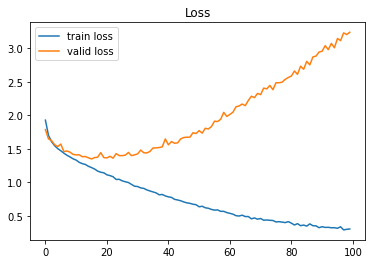

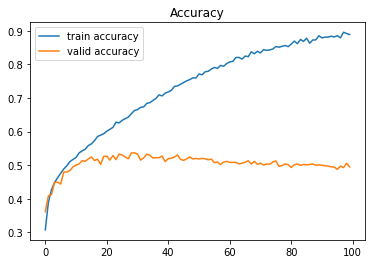

In [11]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## 作業
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢